# Pandas
https://pandas.pydata.org/

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

## Dataframe

pd.Dataframe è la struttura che rappresenta una tabella di dati.
È la struttura centrale della libreria.

In [2]:
#si può inizializzare in vari modi, ad esempio da un dizionario di liste
data={'GEO'       : ['Italy', 'Nord-Ovest', 'Nord-Est', 'Centro (IT)', 'Sud', 'Isole'],
      'Area (km2)': [302073, 57928, 62327, 58085, 73800, 49933],
      'Sigla'     : ['ITA','NO','NE','C','S','I']  }
aree = pd.DataFrame(data)

In [3]:
aree

,Area (km2),GEO,Sigla
0,302073,Italy,ITA
1,57928,Nord-Ovest,NO
2,62327,Nord-Est,NE
3,58085,Centro (IT),C
4,73800,Sud,S
5,49933,Isole,I


In [4]:
aree_ind=aree.set_index("Sigla")


In [5]:
aree_ind

,Area (km2),GEO
Sigla,,
ITA,302073,Italy
NO,57928,Nord-Ovest
NE,62327,Nord-Est
C,58085,Centro (IT)
S,73800,Sud
I,49933,Isole


## Serie
pd.Series è la struttura che rappresenta le colonne del dataframe. Ogni serie è una sequenza di valori + sequenza di label

In [6]:
print(type(aree_ind['GEO']))
#per accedere alle colonne usiamo le parentesi quadre
aree_ind['GEO']

<class 'pandas.core.series.Series'>


Sigla
ITA          Italy
NO      Nord-Ovest
NE        Nord-Est
C      Centro (IT)
S              Sud
I            Isole
Name: GEO, dtype: object

In [7]:
#con `loc` + label si accede per riga
aree_ind.loc['S']

Area (km2)    73800
GEO             Sud
Name: S, dtype: object

In [8]:
aree_ind[:5]

,Area (km2),GEO
Sigla,,
ITA,302073,Italy
NO,57928,Nord-Ovest
NE,62327,Nord-Est
C,58085,Centro (IT)
S,73800,Sud


Un altro modo nel quale si può inizializzare è da un file, che può essere di vari tipi: CSV, Excel, JSON....

In [11]:
with open('datasets/densita_circoscrizioni.csv') as f:
    for i in range(4):
        print(f.readline())

"TIME","GEO","UNIT","Value","Flag and Footnotes"

"1990","Italy","Persons per square kilometre","188.2",""

"1990","Nord-Ovest","Persons per square kilometre","273.7",""

"1990","Nord-Est","Persons per square kilometre",":",""



In [12]:
df_densita=pd.read_csv('datasets/densita_circoscrizioni.csv',usecols=["TIME","GEO","Value"],na_values=":")

In [13]:
df_densita.head()

,TIME,GEO,Value
0,1990,Italy,188.2
1,1990,Nord-Ovest,273.7
2,1990,Nord-Est,NaN
3,1990,Centro (IT),NaN
4,1990,Sud,189.7


In [14]:
densita_italia=df_densita[df_densita["GEO"]=="Italy"]
densita_centro=df_densita[df_densita.GEO=="Centro (IT)"]
print(densita_italia)

     TIME    GEO  Value
0    1990  Italy  188.2
6    1991  Italy  188.4
12   1992  Italy  192.5
18   1993  Italy  192.6
24   1994  Italy  192.6
30   1995  Italy  192.6
36   1996  Italy  192.7
42   1997  Italy  192.8
48   1998  Italy  192.8
54   1999  Italy  192.9
60   2000  Italy  193.0
66   2001  Italy  193.1
72   2002  Italy  193.3
78   2003  Italy  194.2
84   2004  Italy  195.5
90   2005  Italy  196.4
96   2006  Italy  197.0
102  2007  Italy  198.0
108  2008  Italy  199.3
114  2009  Italy  200.2
120  2010  Italy  200.9
126  2011  Italy  201.2
132  2012  Italy  201.8
138  2013  Italy  199.4
144  2014  Italy  206.0
150  2015  Italy  205.8
156  2016  Italy  205.4
162  2017  Italy  203.3


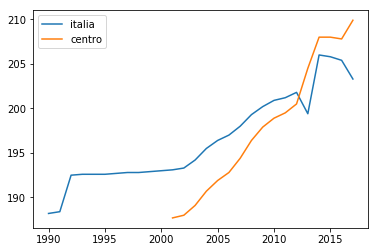

In [15]:
plt.plot(densita_italia["TIME"],densita_italia["Value"],label="italia")
plt.plot(densita_centro.TIME,densita_centro.Value,label="centro")
plt.legend()
plt.show()

Cerchiamo di capire a cosa possa essere dovuto il "buco" nel 2013, individuando in quale circoscrizione è diminuita la popolazione.
Il piano è:
* passare da densità a popolazione totale, utilizzando la superficie delle circoscrizioni, informazione contenuta nel dataframe
    * unire l'informazione della superficie nello stesso dataframe con le densità
* raggruppare le informazioni della popolazione in una tabella pivot
* visualizzare in quale cirscocrizione c'è stato un calo di popolazione

In [16]:
help(df_densita.merge)

Help on method merge in module pandas.core.frame:

merge(self, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None) method of pandas.core.frame.DataFrame instance
    Merge DataFrame or named Series objects with a database-style join.
    
    The join is done on columns or indexes. If joining columns on
    columns, the DataFrame indexes *will be ignored*. Otherwise if joining indexes
    on indexes or indexes on a column or columns, the index will be passed on.
    
    Parameters
    ----------
    right : DataFrame or named Series
        Object to merge with.
    how : {'left', 'right', 'outer', 'inner'}, default 'inner'
        Type of merge to be performed.
    
        * left: use only keys from left frame, similar to a SQL left outer join;
          preserve key order.
        * right: use only keys from right frame, similar to a SQL right outer join;
       

In [17]:
aree

,Area (km2),GEO,Sigla
0,302073,Italy,ITA
1,57928,Nord-Ovest,NO
2,62327,Nord-Est,NE
3,58085,Centro (IT),C
4,73800,Sud,S
5,49933,Isole,I


In [18]:
df_densita[:30]

,TIME,GEO,Value
0,1990,Italy,188.2
1,1990,Nord-Ovest,273.7
2,1990,Nord-Est,NaN
3,1990,Centro (IT),NaN
4,1990,Sud,189.7
5,1990,Isole,132.8
6,1991,Italy,188.4
7,1991,Nord-Ovest,273.5
8,1991,Nord-Est,NaN
9,1991,Centro (IT),NaN


In [19]:
df_popolazione = df_densita.merge(aree, on="GEO")
df_popolazione[:3]

,TIME,GEO,Value,Area (km2),Sigla
0,1990,Italy,188.2,302073,ITA
1,1991,Italy,188.4,302073,ITA
2,1992,Italy,192.5,302073,ITA


In [20]:
df_popolazione["pop_totale"]=df_popolazione["Area (km2)"]*df_popolazione["Value"]
df_popolazione[:3]

,TIME,GEO,Value,Area (km2),Sigla,pop_totale
0,1990,Italy,188.2,302073,ITA,56850138.6
1,1991,Italy,188.4,302073,ITA,56910553.2
2,1992,Italy,192.5,302073,ITA,58149052.5


In [21]:
intorno_2013=df_popolazione[df_popolazione["TIME"].isin([2012,2013,2014])]
pivot=pd.pivot_table(intorno_2013,values=["pop_totale"],
                    index=['GEO'], columns=['TIME'])
#plt.plot(anno_2011)

In [22]:
pivot

pop_totale                        
TIME               2012        2013        2014
GEO                                            
Centro (IT)  11646042.5  11878382.5  12081680.0
Isole         6725975.1   6701008.6   6845814.3
Italy        60958331.4  60233356.2  62227038.0
Nord-Est     11486866.1  11586589.3  11655149.0
Nord-Ovest   16283560.8  15993920.8  16619543.2
Sud          14309820.0  14073660.0  14501700.0

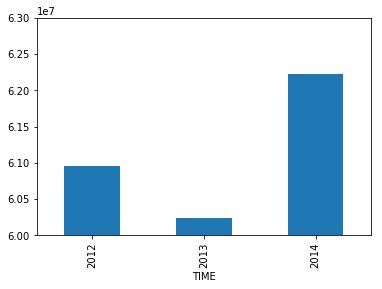

In [23]:
#rifai il plot con matplotlib 

pivot.loc["Italy"]["pop_totale"].plot("bar",ylim=[6e7,6.3e7])


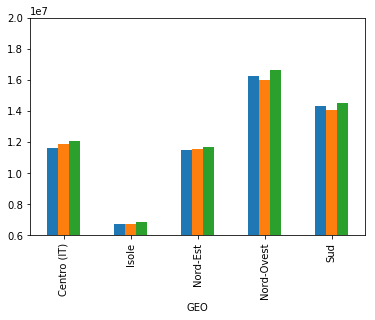

In [24]:
pivot.drop("Italy").plot.bar(legend=None,ylim=[6e6,2e7])


## Esercizio
il file datasets/demo_r_d3dens_1_Data.utf8.csv ontiene i dati per tutte le circoscrizioni, regioni e province italiane.
Plottate l'andamento nel tempo della vostra circorscrizione/regione/provincia

In [56]:
%matplotlib notebook

In [27]:
with open('datasets/demo_r_d3dens_1_Data.utf8.csv') as f:
    for i in range(4):
        print(f.readline())

"TIME","GEO","UNIT","Value","FlagandFootnotes"

"1990","Italy","Personspersquarekilometre","188.2",""

"1990","Nord-Ovest","Personspersquarekilometre","273.7",""

"1990","Piemonte","Personspersquarekilometre","169.9",""



In [28]:
df_densita=pd.read_csv('datasets/demo_r_d3dens_1_Data.utf8.csv',usecols=["TIME","GEO","Value"],na_values=":")

In [29]:
df_densita_2015=df_densita[df_densita["TIME"]==2015]

In [30]:
densita_asti=df_densita[df_densita["GEO"]=="Asti"]
densita_enna=df_densita[df_densita.GEO=="Enna"]
print(densita_asti)
print(densita_enna)

      TIME   GEO  Value
9     1990  Asti  137.6
146   1991  Asti  137.9
283   1992  Asti  138.7
420   1993  Asti  138.4
557   1994  Asti  138.3
694   1995  Asti  138.2
831   1996  Asti  138.3
968   1997  Asti  138.5
1105  1998  Asti  138.7
1242  1999  Asti  138.9
1379  2000  Asti  139.0
1516  2001  Asti  139.0
1653  2002  Asti  139.1
1790  2003  Asti  140.0
1927  2004  Asti  141.1
2064  2005  Asti  141.6
2201  2006  Asti  142.0
2338  2007  Asti  143.0
2475  2008  Asti  144.5
2612  2009  Asti  145.2
2749  2010  Asti  145.3
2886  2011  Asti  145.2
3023  2012  Asti  145.3
3160  2013  Asti  145.0
3297  2014  Asti  146.6
3434  2015  Asti  145.8
3571  2016  Asti  144.9
3708  2017  Asti  143.6
      TIME   GEO  Value
124   1990  Enna   73.1
261   1991  Enna   72.8
398   1992  Enna   73.6
535   1993  Enna   73.5
672   1994  Enna   73.4
809   1995  Enna   73.2
946   1996  Enna   72.8
1083  1997  Enna   72.4
1220  1998  Enna   71.9
1357  1999  Enna   71.4
1494  2000  Enna   70.8
1631  2001  Enna

<IPython.core.display.Javascript object>


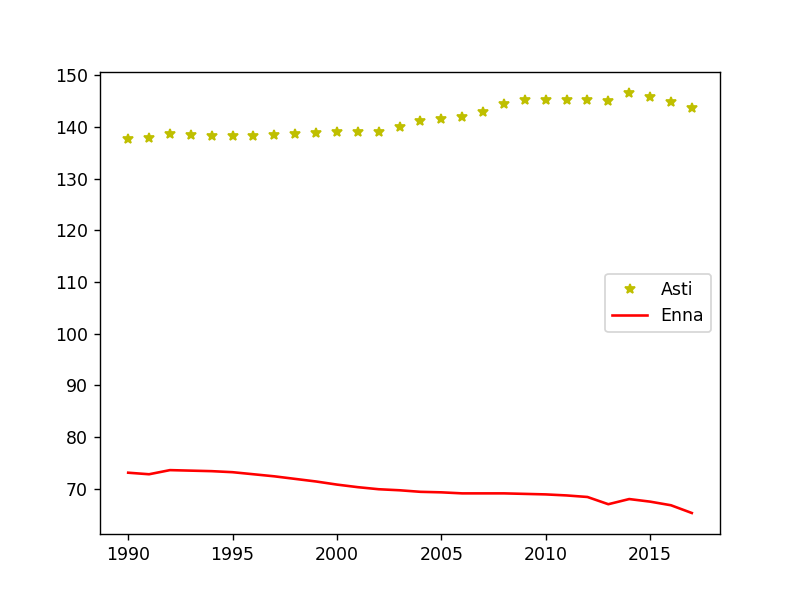

In [58]:
plt.plot(densita_asti["TIME"],densita_asti["Value"],'y*',label="Asti")
plt.plot(densita_enna.TIME,densita_enna.Value,'r',label="Enna")
plt.legend()
plt.show()

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [34]:
with open('datasets/demo_r_d3area_1_Data.utf8.csv') as f:
    for i in range(4):
        print(f.readline())

"TIME","GEO","UNIT","LANDUSE","Value","Flag and Footnotes"

"2011","Italy","Square kilometre","Total area","301336.0",""

"2011","Nord-Ovest","Square kilometre","Total area","57950.1",""

"2011","Piemonte","Square kilometre","Total area","25402.5",""



In [38]:
df_area=pd.read_csv('datasets/aree.csv',usecols=["GEO","Value"],na_values=":")
df_area

,GEO,Value
0,Italy,301336.0
1,Nord-Ovest,57950.1
2,Piemonte,25402.5
3,Torino,6830.3
4,Vercelli,2088.1
5,Biella,917.3
6,Verbano-Cusio-Ossola,2254.8
7,Novara,1338.1
8,Cuneo,6902.7
9,Asti,1510.8


In [39]:
df_popolazione = df_densita.merge(df_area, on="GEO")
df_popolazione[:100]

,TIME,GEO,Value_x,Value_y
0,1990,Italy,188.2,301336.0
1,1991,Italy,188.4,301336.0
2,1992,Italy,192.5,301336.0
3,1993,Italy,192.6,301336.0
4,1994,Italy,192.6,301336.0
5,1995,Italy,192.6,301336.0
6,1996,Italy,192.7,301336.0
7,1997,Italy,192.8,301336.0
8,1998,Italy,192.8,301336.0
9,1999,Italy,192.9,301336.0


In [40]:
df_popolazione["poptotale"]=df_popolazione["Value_x"]*df_popolazione["Value_y"]
df_popolazione[:100]

,TIME,GEO,Value_x,Value_y,poptotale
0,1990,Italy,188.2,301336.0,56711435.20
1,1991,Italy,188.4,301336.0,56771702.40
2,1992,Italy,192.5,301336.0,58007180.00
3,1993,Italy,192.6,301336.0,58037313.60
4,1994,Italy,192.6,301336.0,58037313.60
5,1995,Italy,192.6,301336.0,58037313.60
6,1996,Italy,192.7,301336.0,58067447.20
7,1997,Italy,192.8,301336.0,58097580.80
8,1998,Italy,192.8,301336.0,58097580.80
9,1999,Italy,192.9,301336.0,58127714.40


In [41]:
popolazione_asti=df_popolazione[df_popolazione["GEO"]=="Asti"]
popolazione_enna=df_popolazione[df_popolazione.GEO=="Enna"]
print(popolazione_asti)
print(popolazione_enna)

     TIME   GEO  Value_x  Value_y  poptotale
252  1990  Asti    137.6   1510.8  207886.08
253  1991  Asti    137.9   1510.8  208339.32
254  1992  Asti    138.7   1510.8  209547.96
255  1993  Asti    138.4   1510.8  209094.72
256  1994  Asti    138.3   1510.8  208943.64
257  1995  Asti    138.2   1510.8  208792.56
258  1996  Asti    138.3   1510.8  208943.64
259  1997  Asti    138.5   1510.8  209245.80
260  1998  Asti    138.7   1510.8  209547.96
261  1999  Asti    138.9   1510.8  209850.12
262  2000  Asti    139.0   1510.8  210001.20
263  2001  Asti    139.0   1510.8  210001.20
264  2002  Asti    139.1   1510.8  210152.28
265  2003  Asti    140.0   1510.8  211512.00
266  2004  Asti    141.1   1510.8  213173.88
267  2005  Asti    141.6   1510.8  213929.28
268  2006  Asti    142.0   1510.8  214533.60
269  2007  Asti    143.0   1510.8  216044.40
270  2008  Asti    144.5   1510.8  218310.60
271  2009  Asti    145.2   1510.8  219368.16
272  2010  Asti    145.3   1510.8  219519.24
273  2011 

<IPython.core.display.Javascript object>


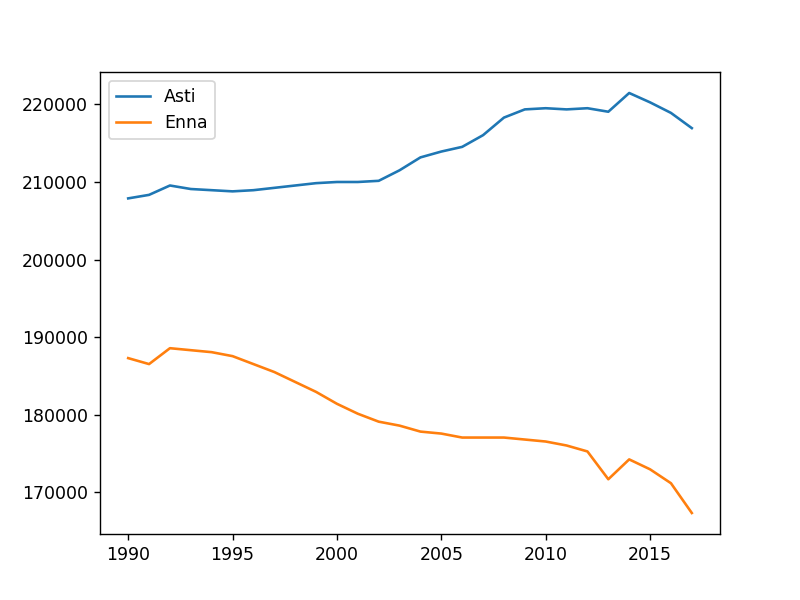

In [59]:
plt.plot(popolazione_asti["TIME"],popolazione_asti["poptotale"],label="Asti")
plt.plot(popolazione_enna.TIME,popolazione_enna.poptotale,label="Enna")
plt.legend()
plt.show()

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [44]:
with open('datasets/lab_full.csv') as f:
    for i in range(4):
        print(f.readline())

VIma.call,MApcr,Latitude,Longitude

1,24.23,39.30902,-122.1068

0,29.17,61.3255,-163.4436

0,50,39.30902,-122.1068



In [45]:
df_AvianVirus=pd.read_csv('datasets/lab_full.csv',usecols=["VIma.call","MApcr", "Latitude", "Longitude"])

In [46]:
df_AvianVirus

,VIma.call,MApcr,Latitude,Longitude
0,1,24.23,39.309020,-122.106800
1,0,29.17,61.325500,-163.443600
2,0,50.00,39.309020,-122.106800
3,1,38.15,31.206580,-91.888596
4,0,38.56,58.300000,-134.500000
5,0,42.99,66.451720,-145.535230
6,0,34.30,43.651320,-91.256810
7,0,29.74,42.200860,-111.365200
8,0,39.41,43.824870,-117.007770
9,1,32.62,40.930000,-111.950000


In [47]:
noduplicates=df_AvianVirus.drop_duplicates("Latitude").drop_duplicates("Longitude")

<IPython.core.display.Javascript object>


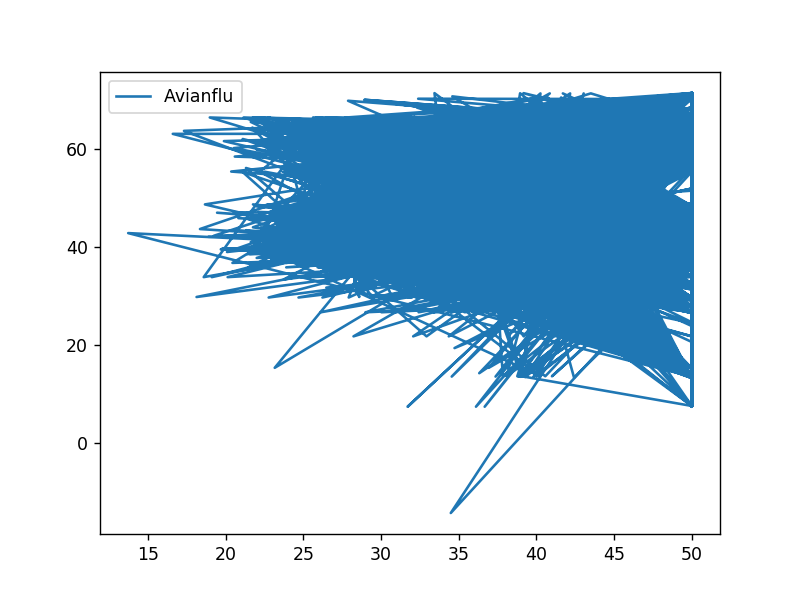

In [60]:
plt.plot(df_AvianVirus["MApcr"],df_AvianVirus["Latitude"],label="Avianflu")
plt.legend()
plt.show()

In [49]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [50]:
noduplicates.pivot(index='Latitude', columns='Longitude', values='MApcr')

Longitude,-179.3567,-179.3558,-179.3502,-179.3387,-179.2998,-179.2624,-179.2619,-179.2602,-178.9125,-178.8267,...,145.7061,145.7062,145.7063,145.7073,145.70873,145.7096,145.7912,145.79163,145.8182,166.646
Latitude,,,,,,,,,,,,,,,,,,,,,
-14.346310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7.327250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7.329200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7.336810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7.455990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7.491820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7.492270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13.171670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13.274130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>


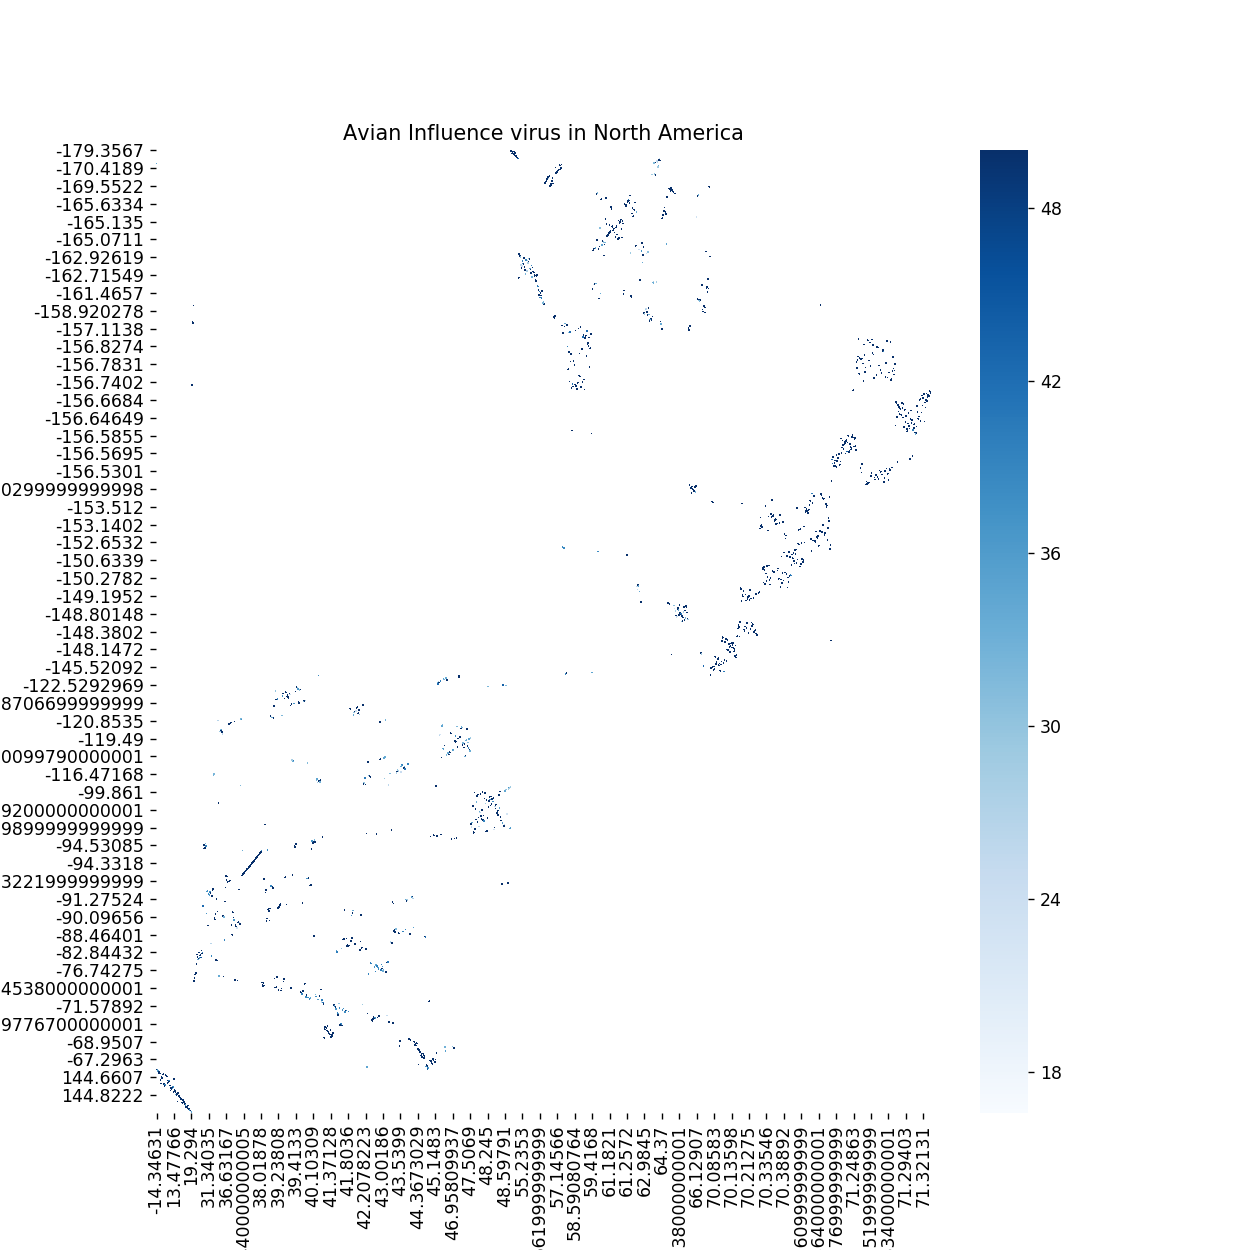

Text(0.5,1,'Avian Influence virus in North America')

In [61]:
plt.figure(figsize=(10, 10))
ax = sns.heatmap(noduplicates.pivot(index='Longitude', columns='Latitude', values='MApcr'), cmap="Blues")
ax.set_title("Avian Influence virus in North America")